# Machine Learning 1 - Nearest Neighbors and Decision Trees

## Lab objectives

* Classification with decision trees and random forests.
* Cross-validation and evaluation.

In [2]:
from lab_tools import CIFAR10, get_hog_image

dataset = CIFAR10('../../extern_data/CIFAR10/')

c:\Users\Andrei\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Pre-loading training data
Pre-loading test data


# 1. Nearest Neighbor

The following example uses the Nearest Neighbor algorithm on the Histogram of Gradient decriptors in the dataset.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit( dataset.train['hog'], dataset.train['labels'] )

KNeighborsClassifier(n_neighbors=1)

* What is the **descriptive performance** of this classifier ?
* Modify the code to estimate the **predictive performance**.
* Use cross-validation to find the best hyper-parameters for this method.

Best score =  0.7097333333333333
Best n =  5


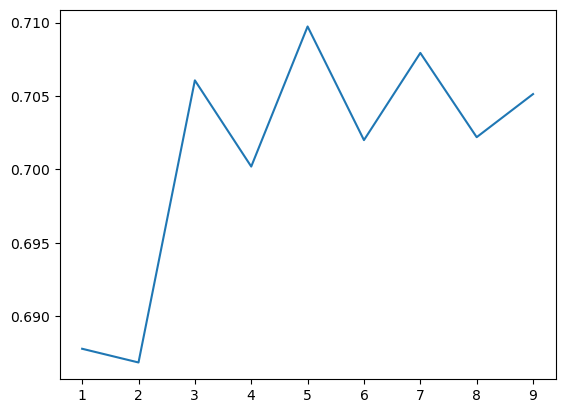

In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
n_neighbors = np.arange(1, 10, 1)
scores = []
best_score = 0
best_n = 0
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    cross_val = cross_val_score(clf, dataset.train['hog'], dataset.train['labels']).mean()
    scores.append(cross_val)
    if cross_val > best_score:
        best_n = n
        best_score = cross_val

plt.plot(n_neighbors, scores)
print("Best score = ", best_score)
print("Best n = ", best_n)

## 2. Decision Trees

[Decision Trees](http://scikit-learn.org/stable/modules/tree.html#tree) classify the data by splitting the feature space according to simple, single-feature rules. Scikit-learn uses the [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) algorithm for [its implementation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of the classifier. 

* **Create a simple Decision Tree classifier** using scikit-learn and train it on the HoG training set.
* Use cross-validation to find the best hyper-paramters for this method.

5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
Best score =  0.604
Best n =  9


Text(0, 0.5, 'Accuracy')

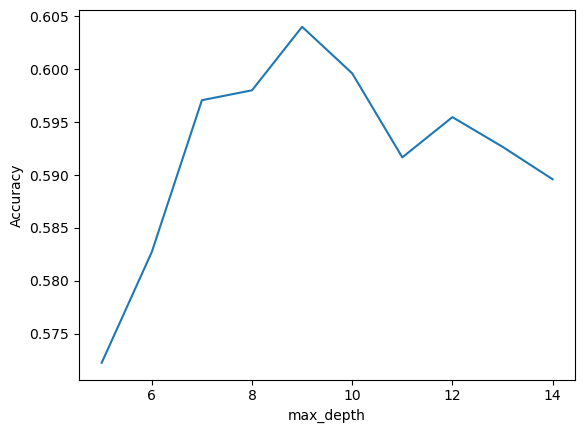

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

hyperparameters = np.arange(7, 11, 1)

scores = []
best_score = 0
best_hyperparameter = 0
for hyperparameter in hyperparameters:
    clf = DecisionTreeClassifier(max_depth=hyperparameter)
    cross_val = cross_val_score(clf, dataset.train['hog'], dataset.train['labels']).mean()
    scores.append(cross_val)
    if cross_val > best_score:
        best_hyperparameter = hyperparameter
        best_score = cross_val
    print(hyperparameter, 'done')

plt.plot(hyperparameters, scores)
print("Best score = ", best_score)
print("Best n = ", best_hyperparameter)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid_decision_tree = {
    'max_depth': [5, 9, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search.fit(dataset.train['hog'], dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.6052


Best score =  0.6036000000000001
Best n =  9


Text(0, 0.5, 'Accuracy')

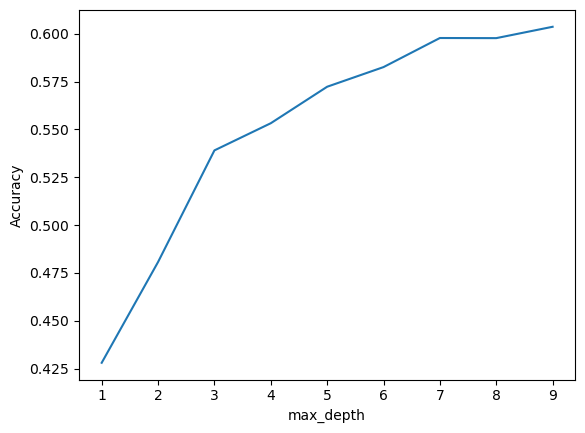

In [7]:
clf = DecisionTreeClassifier(max_depth=best_hyperparameter)
clf.fit(dataset.train['hog'], dataset.train['labels'])
pred = clf.predict(dataset.test['hog'])


## 3. Random Forests

[Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers use multiple decision trees trained on "weaker" datasets (less data and/or less features), averaging the results so as to reduce over-fitting.

* Use scikit-learn to **create a Random Forest classifier** on the CIFAR data. 
* Use cross-validation to find the best hyper-parameters for this method.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    "n_estimators": [10, 100, 200],
    "max_depth": 9
}

clf = RandomForestClassifier()

grid_search_RFC = GridSearchCV(clf, param_grid=param_grid)
grid_search_RFC.fit(dataset.train['hog'], dataset.train['labels'])

print(grid_search_RFC.best_params_)
print(grid_search_RFC.cv_results_)